In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [2]:
df = pd.read_csv("dataA.csv")
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0,0.97200,0.567,313293,0.227,0,0.601000,10,0.110,-13.441,1,47,0.0290,136.123,0.0396,2000
1,1,0.32100,0.821,360240,0.418,0,0.000372,9,0.222,-9.841,0,51,0.0407,117.382,0.8030,2000
2,2,0.00659,0.706,202507,0.602,1,0.000138,11,0.400,-8.306,0,44,0.3420,89.692,0.4790,2000
3,3,0.00390,0.368,173360,0.977,0,0.000000,11,0.350,-2.757,0,52,0.1270,165.889,0.5480,2000
4,4,0.12200,0.501,344200,0.511,0,0.000000,7,0.279,-9.836,0,53,0.0291,78.045,0.1130,2000


In [3]:
y = df["mode"]
target_names = ["minor", "major"]

In [4]:
X = df.drop("mode", axis=1)
X.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence,year
0,0,0.97200,0.567,313293,0.227,0,0.601000,10,0.110,-13.441,47,0.0290,136.123,0.0396,2000
1,1,0.32100,0.821,360240,0.418,0,0.000372,9,0.222,-9.841,51,0.0407,117.382,0.8030,2000
2,2,0.00659,0.706,202507,0.602,1,0.000138,11,0.400,-8.306,44,0.3420,89.692,0.4790,2000
3,3,0.00390,0.368,173360,0.977,0,0.000000,11,0.350,-2.757,52,0.1270,165.889,0.5480,2000
4,4,0.12200,0.501,344200,0.511,0,0.000000,7,0.279,-9.836,53,0.0291,78.045,0.1130,2000


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=36)

In [6]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [7]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.612
k: 3, Train/Test Score: 0.806/0.636
k: 5, Train/Test Score: 0.760/0.650
k: 7, Train/Test Score: 0.738/0.666
k: 9, Train/Test Score: 0.730/0.669
k: 11, Train/Test Score: 0.720/0.672
k: 13, Train/Test Score: 0.715/0.670
k: 15, Train/Test Score: 0.711/0.676
k: 17, Train/Test Score: 0.708/0.678
k: 19, Train/Test Score: 0.703/0.679
k: 21, Train/Test Score: 0.700/0.682
k: 23, Train/Test Score: 0.701/0.682
k: 25, Train/Test Score: 0.698/0.682
k: 27, Train/Test Score: 0.696/0.681
k: 29, Train/Test Score: 0.696/0.682
k: 31, Train/Test Score: 0.695/0.684
k: 33, Train/Test Score: 0.693/0.682
k: 35, Train/Test Score: 0.692/0.680
k: 37, Train/Test Score: 0.691/0.681
k: 39, Train/Test Score: 0.691/0.679


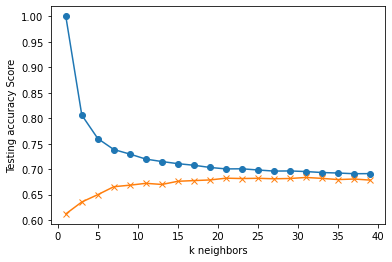

In [8]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [9]:
# Note that k: 35 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(X_train_scaled, y_train)
print('k=35 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=35 Test Acc: 0.680
